# **Modules**

In [2]:
from google.colab import drive
import cv2
from google.colab.patches import cv2_imshow
import os
import pandas as pd
import numpy as np
import random
import tensorflow as tf
from keras.utils import np_utils
import seaborn as sns
from collections import OrderedDict
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from keras.preprocessing.image import ImageDataGenerator
# example of loading an image with the Keras API
from tensorflow.keras.utils import load_img
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, BatchNormalization, Conv2D, Dense, Dropout, Flatten, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import MaxPooling2D, Rescaling

# **Load dataset**

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!apt install unzip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-21ubuntu1.2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.


In [5]:
!unzip  /content/drive/MyDrive/OCR-DATASET-PROF/DL-OCR-Arabic-main.zip 

Archive:  /content/drive/MyDrive/OCR-DATASET-PROF/DL-OCR-Arabic-main.zip
fe829d254cd85cf845897b9c1f631a7751c6e1c4
   creating: DL-OCR-Arabic-main/
  inflating: DL-OCR-Arabic-main/.gitignore  
  inflating: DL-OCR-Arabic-main/LICENSE  
  inflating: DL-OCR-Arabic-main/README.md  
   creating: DL-OCR-Arabic-main/datatset/
  inflating: DL-OCR-Arabic-main/datatset/.DS_Store  
   creating: DL-OCR-Arabic-main/datatset/abed/
  inflating: DL-OCR-Arabic-main/datatset/abed/abed001.tif  
  inflating: DL-OCR-Arabic-main/datatset/abed/abed002.tif  
  inflating: DL-OCR-Arabic-main/datatset/abed/abed003.tif  
  inflating: DL-OCR-Arabic-main/datatset/abed/abed004.tif  
  inflating: DL-OCR-Arabic-main/datatset/abed/abed005.tif  
  inflating: DL-OCR-Arabic-main/datatset/abed/abed006.tif  
  inflating: DL-OCR-Arabic-main/datatset/abed/abed007.tif  
  inflating: DL-OCR-Arabic-main/datatset/abed/abed008.tif  
  inflating: DL-OCR-Arabic-main/datatset/abed/abed009.tif  
  inflating: DL-OCR-Arabic-main/datatset

# Exemples du dataset

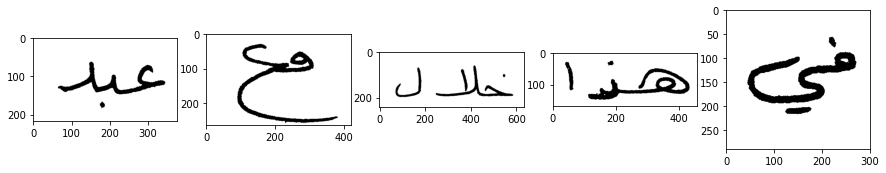

In [86]:
fig, ax = plt.subplots(1, 5, figsize=(15, 10))

img =  load_img('/content/DL-OCR-Arabic-main/datatset/abed/abed001.tif')
img2 =  load_img('/content/DL-OCR-Arabic-main/datatset/ma/ma006.tif')
img3 =  load_img('/content/DL-OCR-Arabic-main/datatset/khelal/khelal001.tif')
img4 =  load_img('/content/DL-OCR-Arabic-main/datatset/hatha/hatha006.tif')
img5 = load_img('/content/DL-OCR-Arabic-main/datatset/in/in021.tif')
ax[0].imshow(img)
ax[1].imshow(img2)
ax[2].imshow(img3)
ax[3].imshow(img4)
ax[4].imshow(img5)

# Building dataset

In [6]:
dataset_images  = []
dataset_labels = []
directory ='/content/DL-OCR-Arabic-main/datatset/abed'
rootdir = '/content/DL-OCR-Arabic-main/datatset'
shape = (200,200)
for subdir, dirs, files in os.walk(rootdir):
 
  for file in files:
    if file.split('.')[1] == 'tif':

      img = cv2.imread(os.path.join(subdir, file))
      img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
      img = cv2.resize(img,shape)
      dataset_images.append(img)
      dataset_labels.append(os.path.basename(subdir))


df = pd.DataFrame()
df['images'] = dataset_images
df['labels'] = dataset_labels
labels = dataset_labels
train_labels = pd.get_dummies(labels ).values
dataset_images = np.array(dataset_images)
dataset_labels = np.array(dataset_labels)

print(df)


                                                 images labels
0     [[255, 255, 255, 255, 255, 255, 255, 255, 255,...    hya
1     [[255, 255, 255, 255, 255, 255, 255, 255, 255,...    hya
2     [[255, 255, 255, 255, 255, 255, 255, 255, 255,...    hya
3     [[255, 255, 255, 255, 255, 255, 255, 255, 255,...    hya
4     [[255, 255, 255, 255, 255, 255, 255, 255, 255,...    hya
...                                                 ...    ...
1903  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...     en
1904  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...     en
1905  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...     en
1906  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...     en
1907  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...     en

[1908 rows x 2 columns]


In [7]:
unique_labels = list(OrderedDict.fromkeys(labels))
df_labels = pd.DataFrame()
df_labels['labels'] = df['labels']
labelencoder = LabelEncoder()
df_labels['labels_cat'] = labelencoder.fit_transform(df_labels['labels'] )
new_y = np.array(df_labels['labels_cat'] )

unique_labels_num = np.array(df_labels['labels_cat'].drop_duplicates())
print(df_labels)
print(new_y)
print(unique_labels_num)
print(unique_labels)

dict_lab =dict()
for i in range(0,len(unique_labels_num)):
  dict_lab[unique_labels_num[i]] = unique_labels[i]

print(dict_lab)

     labels  labels_cat
0       hya          15
1       hya          15
2       hya          15
3       hya          15
4       hya          15
...     ...         ...
1903     en          10
1904     en          10
1905     en          10
1906     en          10
1907     en          10

[1908 rows x 2 columns]
[15 15 15 ... 10 10 10]
[15  0 22 19 11  5  7 16  1 27  4  3 23  9 18 14 25 24  8  2 21 12 20 26
 13  6 17 10]
['hya', 'abed', 'mn', 'kma', 'hatha', 'alty', 'an', 'in', 'ala', 'ykon', 'althy', 'allah', 'mohd', 'ela', 'khelal', 'hwa', 'qd', 'qabel', 'aw', 'alaam', 'maa', 'hathih', 'ma', 'tm', 'hnak', 'alyom', 'kan', 'en']
{15: 'hya', 0: 'abed', 22: 'mn', 19: 'kma', 11: 'hatha', 5: 'alty', 7: 'an', 16: 'in', 1: 'ala', 27: 'ykon', 4: 'althy', 3: 'allah', 23: 'mohd', 9: 'ela', 18: 'khelal', 14: 'hwa', 25: 'qd', 24: 'qabel', 8: 'aw', 2: 'alaam', 21: 'maa', 12: 'hathih', 20: 'ma', 26: 'tm', 13: 'hnak', 6: 'alyom', 17: 'kan', 10: 'en'}


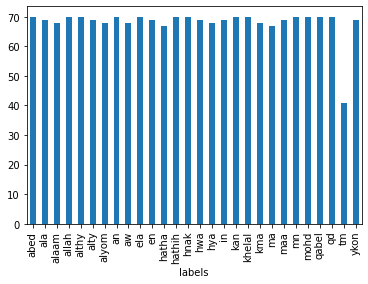

In [8]:
df2 = df.groupby(['labels'])['labels'].count().plot(kind='bar')

hya


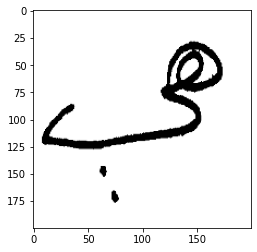

In [9]:
plt.imshow(dataset_images[0], cmap='Greys_r')
print(dataset_labels[0])

In [92]:
df['labels']

0       hya
1       hya
2       hya
3       hya
4       hya
       ... 
1903     en
1904     en
1905     en
1906     en
1907     en
Name: labels, Length: 1908, dtype: object

**Reshape data for layer input**

In [93]:
print(dataset_images[80].shape)

(200, 200)


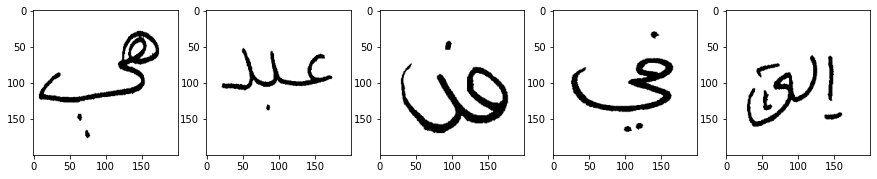

In [94]:
fig, ax = plt.subplots(1, 5, figsize=(15, 10))
ax[0].imshow(dataset_images[0], cmap='Greys_r')
ax[1].imshow(dataset_images[70], cmap='Greys_r')
ax[2].imshow(dataset_images[170], cmap='Greys_r')
ax[3].imshow(dataset_images[500], cmap='Greys_r')
ax[4].imshow(dataset_images[900], cmap='Greys_r')

In [10]:
X_train, X_test, y_train, y_test = train_test_split(dataset_images, train_labels,test_size=0.2, random_state=42)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]


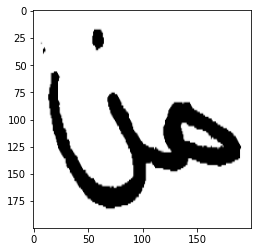

In [11]:
plt.imshow(X_train[0], cmap='Greys_r')
print(y_train[0])

# **Building model**

# **MODEL 1 NO DATAGN**

In [97]:
X_train.shape

(1526, 200, 200)

In [98]:
y_train.shape

(1526, 28)

In [99]:
model = Sequential()

model.add(Conv2D(filters= 32, kernel_size = (3,3), input_shape=(200,200,1), strides=(4,4), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(3,3), strides=(2,2)))
model.add(Conv2D(filters=95, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same",kernel_regularizer =tf.keras.regularizers.l2( l=0.01))) 
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(3,3), strides=(2,2)))
model.add(Conv2D(filters=95, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same",kernel_regularizer =tf.keras.regularizers.l2( l=0.01))) 
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(3,3), strides=(2,2)))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu',kernel_regularizer =tf.keras.regularizers.l2( l=0.01)))
model.add(Dropout(0.5))
model.add(Dense(28, activation='softmax'))
model.compile(optimizer=tf.keras.optimizers.Adam(epsilon=0.001),
              loss='categorical_crossentropy', metrics=['accuracy'])

In [100]:
y_train.shape

(1526, 28)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]


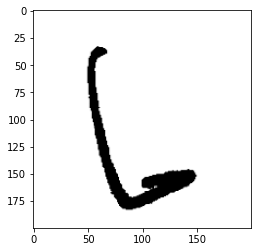

In [101]:
plt.imshow(X_test[10], cmap='Greys_r')
print(y_test[10])


In [102]:
y_train.shape

(1526, 28)

Reshape labels

In [103]:
history = model.fit(X_train,y_train,epochs=40,batch_size=50,validation_data=(X_test,y_test))

Epoch 1/40
31/31 [==============================] - 29s 884ms/step - loss: 14.2281 - accuracy: 0.0898 - val_loss: 13.9110 - val_accuracy: 0.0628
Epoch 2/40
31/31 [==============================] - 27s 869ms/step - loss: 12.1782 - accuracy: 0.1730 - val_loss: 13.8456 - val_accuracy: 0.0864
Epoch 3/40
31/31 [==============================] - 27s 866ms/step - loss: 10.5240 - accuracy: 0.2431 - val_loss: 12.1566 - val_accuracy: 0.1230
Epoch 4/40
31/31 [==============================] - 27s 866ms/step - loss: 8.6987 - accuracy: 0.3768 - val_loss: 9.1705 - val_accuracy: 0.1990
Epoch 5/40
31/31 [==============================] - 27s 869ms/step - loss: 7.0791 - accuracy: 0.5164 - val_loss: 7.6616 - val_accuracy: 0.2958
Epoch 6/40
31/31 [==============================] - 27s 873ms/step - loss: 5.6884 - accuracy: 0.6429 - val_loss: 6.0242 - val_accuracy: 0.4450
Epoch 7/40
31/31 [==============================] - 27s 881ms/step - loss: 4.6103 - accuracy: 0.7490 - val_loss: 4.5904 - val_accuracy: 

In [104]:
# Model Summary
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 50, 50, 32)        320       
                                                                 
 batch_normalization_27 (Bat  (None, 50, 50, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 24, 24, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 24, 24, 95)        76095     
                                                                 
 batch_normalization_28 (Bat  (None, 24, 24, 95)       380       
 chNormalization)                                                
                                                      

In [105]:
y_pred = model.predict(X_test)

12/12 [==============================] - 2s 137ms/step


In [106]:
y_true = y_test

In [107]:
X_test.shape

(382, 200, 200)

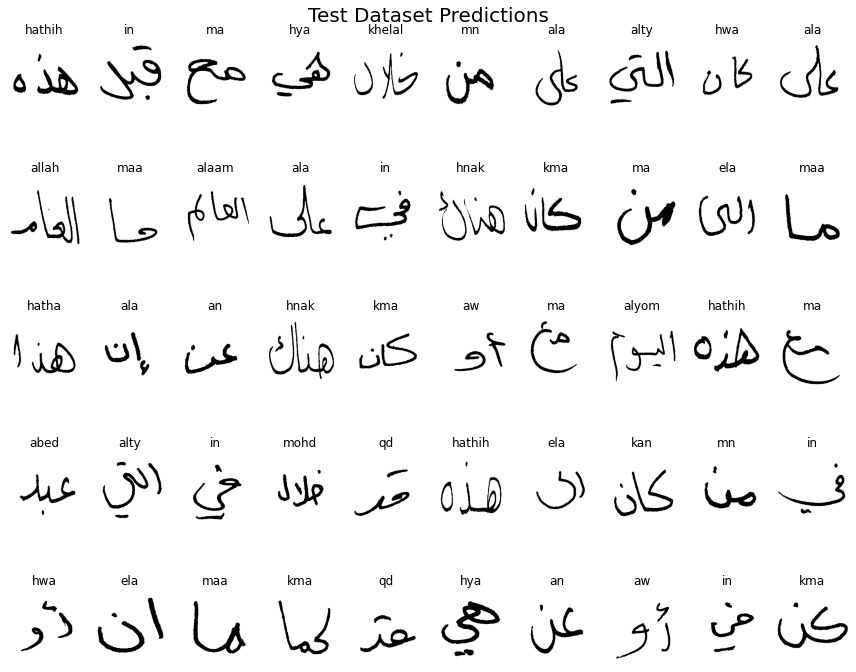

In [108]:
fig, ax = plt.subplots(nrows=5, ncols=10, figsize=(12, 10))
idx =  random.randrange(0,370)

for i in range(5):
    for j in range(10):
        predicted_label = dict_lab[np.argmax(y_pred[idx])]
      
        ax[i, j].set_title(f"{predicted_label}")
        ax[i, j].imshow(X_test[idx], cmap='Greys_r')
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Test Dataset Predictions", fontsize=20)
plt.show()

In [109]:
y_predm=np.argmax(y_pred, axis=1)
y_testm=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_testm, y_predm)

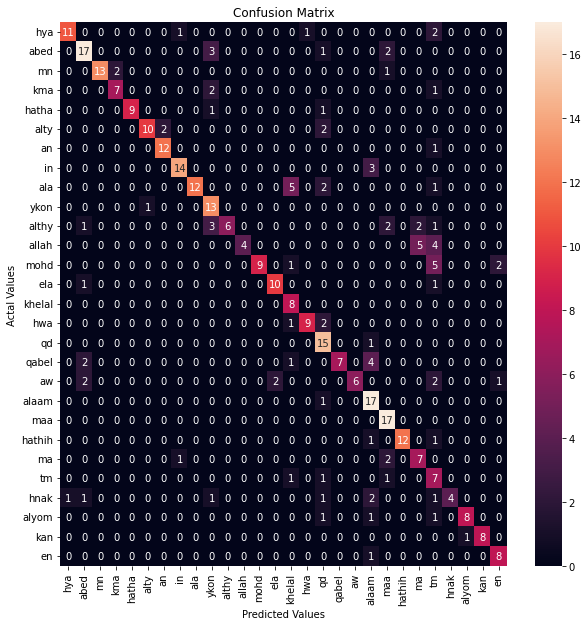

In [110]:
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.

cm_df = pd.DataFrame(cm,
                     index = unique_labels, 
                     columns = unique_labels)

plt.figure(figsize=(10,10))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()


In [111]:
ll = log_loss(y_test, y_pred)

In [112]:
#good score is >8 
cks = cohen_kappa_score(y_testm, y_predm)

In [113]:
# Generate class membership probabilities
#good roc auc >8
ras = roc_auc_score(y_test, y_pred, average="weighted", multi_class="ovr")

In [114]:
table = [[ll, cks, ras]]
pd.DataFrame(table, columns = ["log loss", "cohen_kappa_score", "roc_auc_score"])

,log loss,cohen_kappa_score,roc_auc_score
0,1.200997,0.722587,0.986457


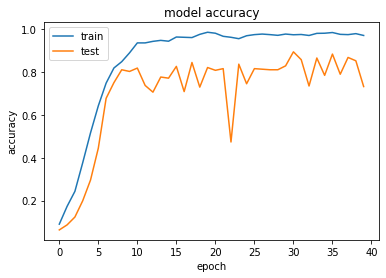

In [115]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

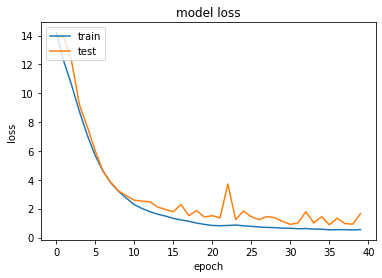

In [116]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [117]:
for i in range( 0,200):
  print('real = {}'.format(dict_lab[np.where(y_true[i] == 1) [0][0] ]+'  pred = {}'.format(dict_lab[np.argmax(y_pred[i])])))

real = maa  pred = maa
real = abed  pred = mohd
real = en  pred = mn
real = ela  pred = ela
real = an  pred = an
real = kan  pred = kan
real = abed  pred = abed
real = in  pred = in
real = ala  pred = ala
real = khelal  pred = hnak
real = maa  pred = maa
real = ela  pred = ela
real = hwa  pred = hwa
real = abed  pred = abed
real = alty  pred = alty
real = en  pred = en
real = qabel  pred = qabel
real = althy  pred = althy
real = alty  pred = alty
real = alaam  pred = alaam
real = kma  pred = kma
real = mohd  pred = ma
real = qabel  pred = qabel
real = aw  pred = aw
real = kma  pred = kma
real = allah  pred = allah
real = abed  pred = mohd
real = hathih  pred = hathih
real = hnak  pred = hnak
real = aw  pred = aw
real = ykon  pred = ykon
real = mohd  pred = hwa
real = ma  pred = ma
real = hathih  pred = hwa
real = kma  pred = in
real = aw  pred = in
real = aw  pred = hwa
real = aw  pred = aw
real = ala  pred = ma
real = alyom  pred = alyom
real = ala  pred = ala
real = hatha  pred = mn


In [118]:
model.save('./models/alexnet_model.h5') 

In [119]:
!mv /content/models/alexnet_model.h5 /content/drive/MyDrive/OCR-DATASET-PROF

# **MODEL 2 NO DATAGN**

In [120]:
X_train.shape

(1526, 200, 200)

In [121]:
y_train.shape

(1526, 28)

In [31]:
model2 = Sequential()

model2.add(Conv2D(filters= 32, kernel_size = (3,3), input_shape=(200,200,1), strides=(4,4), activation="tanh"))
model2.add(BatchNormalization())
model2.add(MaxPool2D(pool_size=(3,3), strides=(2,2)))
model2.add(Conv2D(filters=95, kernel_size=(5,5), strides=(1,1), activation='tanh', padding="same",kernel_regularizer =tf.keras.regularizers.l2( l=0.01))) 
model2.add(BatchNormalization())
model2.add(MaxPool2D(pool_size=(3,3), strides=(2,2)))
model2.add(Conv2D(filters=95, kernel_size=(3,3), strides=(1,1), activation='tanh', padding="same",kernel_regularizer =tf.keras.regularizers.l2( l=0.01))) 
model2.add(BatchNormalization())
model2.add(MaxPool2D(pool_size=(3,3), strides=(2,2)))

model2.add(Flatten())
model2.add(Dense(4096, activation='tanh'))
model2.add(Dropout(0.5))
model2.add(Dense(512, activation='tanh',kernel_regularizer =tf.keras.regularizers.l2( l=0.01)))
model2.add(Dropout(0.5))
model2.add(Dense(28, activation='softmax'))
model2.compile(optimizer=tf.keras.optimizers.Nadam(epsilon=0.001),
              loss='categorical_crossentropy', metrics=['accuracy'])

In [123]:
y_train.shape

(1526, 28)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]


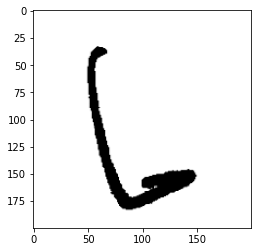

In [124]:
plt.imshow(X_test[10], cmap='Greys_r')
print(y_test[10])

In [125]:
y_train.shape

(1526, 28)

Reshape labels

In [32]:
history = model2.fit(X_train,y_train,epochs=40,batch_size=50,validation_data=(X_test,y_test))

Epoch 1/40
31/31 [==============================] - 18s 523ms/step - loss: 13.8905 - accuracy: 0.0780 - val_loss: 12.6787 - val_accuracy: 0.0812
Epoch 2/40
31/31 [==============================] - 16s 517ms/step - loss: 10.9549 - accuracy: 0.1422 - val_loss: 9.4710 - val_accuracy: 0.1832
Epoch 3/40
31/31 [==============================] - 16s 514ms/step - loss: 8.5549 - accuracy: 0.2837 - val_loss: 8.2496 - val_accuracy: 0.1675
Epoch 4/40
31/31 [==============================] - 16s 513ms/step - loss: 6.6252 - accuracy: 0.4476 - val_loss: 8.2000 - val_accuracy: 0.0759
Epoch 5/40
31/31 [==============================] - 16s 519ms/step - loss: 5.1885 - accuracy: 0.6494 - val_loss: 5.5326 - val_accuracy: 0.4634
Epoch 6/40
31/31 [==============================] - 16s 513ms/step - loss: 4.1450 - accuracy: 0.7759 - val_loss: 5.2708 - val_accuracy: 0.3770
Epoch 7/40
31/31 [==============================] - 16s 515ms/step - loss: 3.3457 - accuracy: 0.8512 - val_loss: 4.2999 - val_accuracy: 0.5

In [33]:
# Model Summary
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 50, 50, 32)        320       
                                                                 
 batch_normalization_3 (Batc  (None, 50, 50, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 95)        76095     
                                                                 
 batch_normalization_4 (Batc  (None, 24, 24, 95)       380       
 hNormalization)                                                 
                                                      

In [34]:
y_pred = model2.predict(X_test)

12/12 [==============================] - 1s 81ms/step


In [35]:
y_true = y_test

In [36]:
X_test.shape

(382, 200, 200, 1)

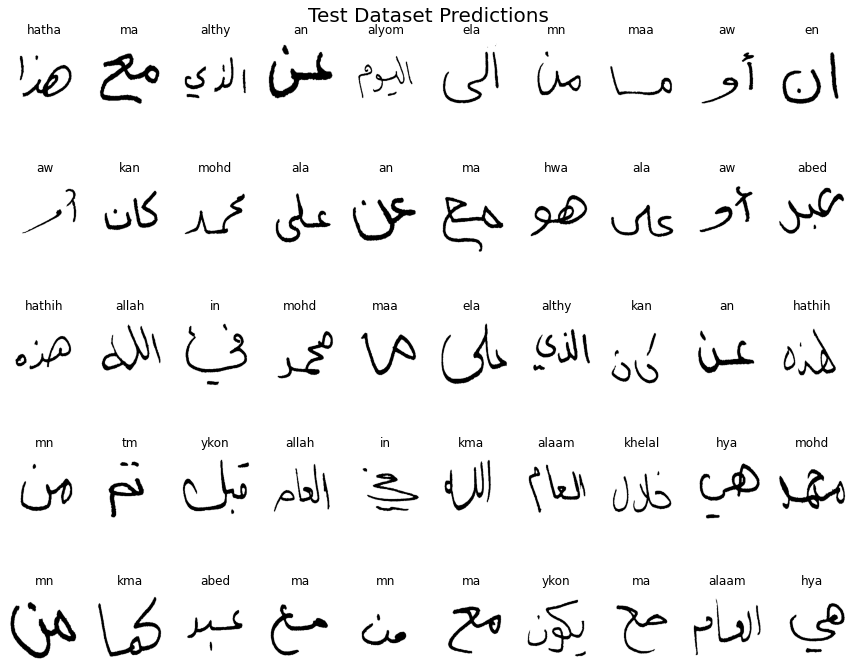

In [40]:
fig, ax = plt.subplots(nrows=5, ncols=10, figsize=(12, 10))
idx =  random.randrange(0,370)

for i in range(5):
    for j in range(10):
        predicted_label = dict_lab[np.argmax(y_pred[idx])]
      
        ax[i, j].set_title(f"{predicted_label}")
        im = cv2.resize(X_test[idx], (200, 200))
        ax[i, j].imshow(im, cmap='Greys_r')
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Test Dataset Predictions", fontsize=20)
plt.show()

In [41]:
y_predm=np.argmax(y_pred, axis=1)
y_testm=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_testm, y_predm)

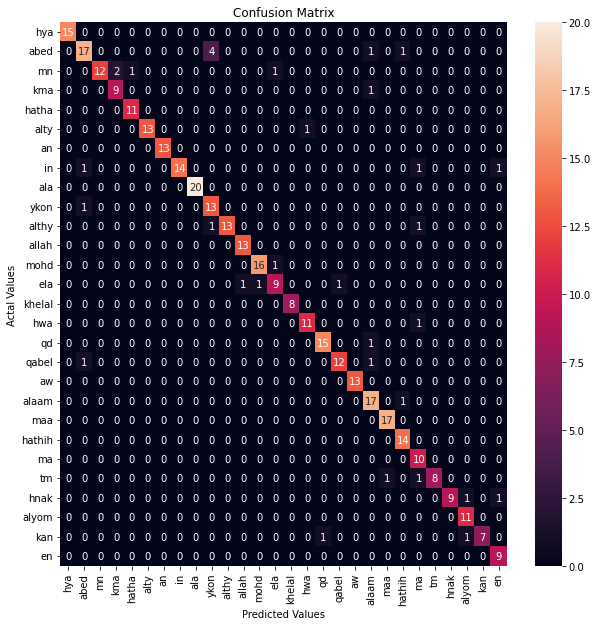

In [42]:
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.

cm_df = pd.DataFrame(cm,
                     index = unique_labels, 
                     columns = unique_labels)

plt.figure(figsize=(10,10))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()


In [43]:
ll = log_loss(y_test, y_pred)

In [44]:
#good score is >8 
cks = cohen_kappa_score(y_testm, y_predm)

In [45]:
# Generate class membership probabilities
#good roc auc >8
ras  = roc_auc_score(y_test, y_pred, average="weighted", multi_class="ovr")

In [46]:
table = [[ll, cks, ras]]
pd.DataFrame(table, columns = ["log loss", "cohen kappa score", "roc auc score"])

,log loss,cohen kappa score,roc auc score
0,0.287046,0.910226,0.998358


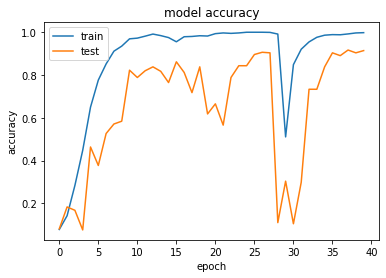

In [47]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

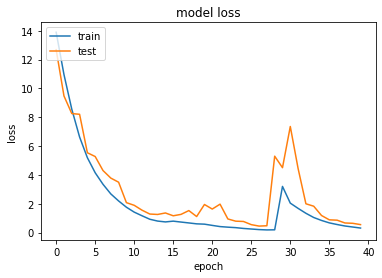

In [48]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [49]:
for i in range( 0,200):
  print('real = {}'.format(dict_lab[np.where(y_true[i] == 1) [0][0] ]+'  pred = {}'.format(dict_lab[np.argmax(y_pred[i])])))

real = maa  pred = maa
real = abed  pred = abed
real = en  pred = en
real = ela  pred = ela
real = an  pred = an
real = kan  pred = kan
real = abed  pred = abed
real = in  pred = in
real = ala  pred = ala
real = khelal  pred = khelal
real = maa  pred = maa
real = ela  pred = ela
real = hwa  pred = hwa
real = abed  pred = abed
real = alty  pred = alty
real = en  pred = en
real = qabel  pred = qabel
real = althy  pred = althy
real = alty  pred = alty
real = alaam  pred = alaam
real = kma  pred = kma
real = mohd  pred = ma
real = qabel  pred = qabel
real = aw  pred = aw
real = kma  pred = kma
real = allah  pred = allah
real = abed  pred = abed
real = hathih  pred = hathih
real = hnak  pred = hnak
real = aw  pred = aw
real = ykon  pred = ykon
real = mohd  pred = mohd
real = ma  pred = ma
real = hathih  pred = hathih
real = kma  pred = kma
real = aw  pred = aw
real = aw  pred = aw
real = aw  pred = aw
real = ala  pred = maa
real = alyom  pred = alyom
real = ala  pred = ala
real = hatha  pre

In [50]:
model2.save('./models/alexnet_model_2.h5') 

In [51]:
!mv /content/models/alexnet_model_2.h5 /content/drive/MyDrive/OCR-DATASET-PROF

# Data Generator

In [14]:
X_train = np.expand_dims(X_train, axis=3)
X_test = np.expand_dims(X_test, axis=3)
print(X_train.shape)
print(X_test.shape)

(1526, 200, 200, 1)
(382, 200, 200, 1)


In [15]:
 #loading training data

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=False)


validation_datagen =  ImageDataGenerator(rescale=1./255)


batch_size = 48

train_generator = train_datagen.flow(X_train,y_train, batch_size=batch_size, shuffle=True)

validation_generator = validation_datagen.flow(X_test,y_test, batch_size=batch_size, shuffle=False)

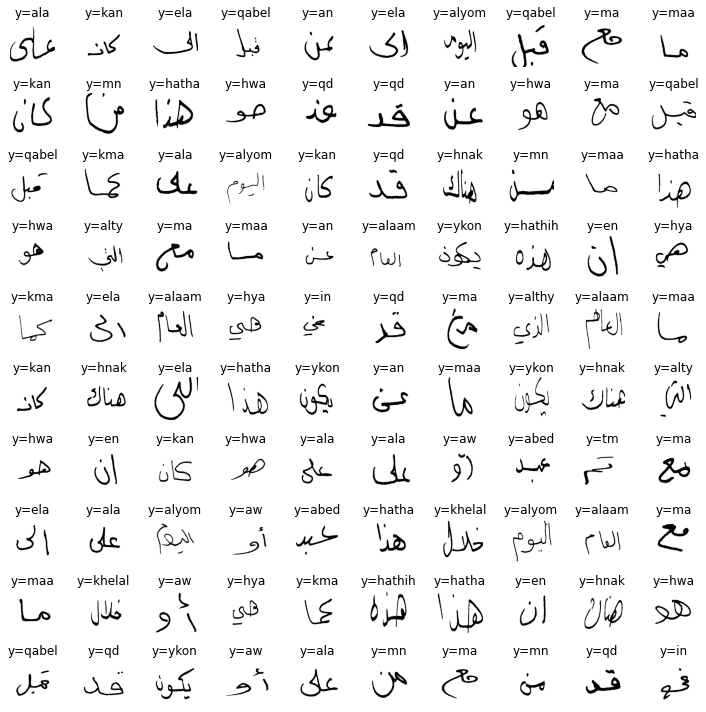

In [16]:
plt.figure(figsize=(10,10))
for i in range(100):
    plt.subplot(10,10,i+1)
    for x,y in train_generator:
        im = cv2.resize(x[0], (200, 200)) 
        plt.imshow(im, cmap='Greys_r')
        idx=np.where(y[0] == 1)
        plt.title('y={}'.format(dict_lab[idx[0][0]]))
        plt.axis('off')
        break
plt.tight_layout()
plt.show()

# Model 1 with data gen

In [146]:
model_da = Sequential()

model_da.add(Conv2D(filters= 32, kernel_size = (3,3), input_shape=(200,200,1), strides=(4,4), activation="relu"))
model_da.add(BatchNormalization())
model_da.add(MaxPool2D(pool_size=(3,3), strides=(2,2)))
model_da.add(Conv2D(filters=95, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same",kernel_regularizer =tf.keras.regularizers.l2( l=0.01))) 
model_da.add(BatchNormalization())
model_da.add(MaxPool2D(pool_size=(3,3), strides=(2,2)))
model_da.add(Conv2D(filters=95, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same",kernel_regularizer =tf.keras.regularizers.l2( l=0.01))) 
model_da.add(BatchNormalization())
model_da.add(MaxPool2D(pool_size=(3,3), strides=(2,2)))

model_da.add(Flatten())
model_da.add(Dense(4096, activation='relu'))
model_da.add(Dropout(0.5))
model_da.add(Dense(512, activation='relu',kernel_regularizer =tf.keras.regularizers.l2( l=0.01)))
model_da.add(Dropout(0.5))
model_da.add(Dense(28, activation='softmax'))
model_da.compile(optimizer=tf.keras.optimizers.Adam(epsilon=0.001),
              loss='categorical_crossentropy', metrics=['accuracy'])

In [147]:
# callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
history = model_da.fit(train_generator,
                    steps_per_epoch=len(X_train) // batch_size,
                    epochs=40,
                    validation_data=(validation_generator))

Epoch 1/40
31/31 [==============================] - 31s 955ms/step - loss: 14.4147 - accuracy: 0.0981 - val_loss: 13.1953 - val_accuracy: 0.0366
Epoch 2/40
31/31 [==============================] - 29s 946ms/step - loss: 12.2793 - accuracy: 0.1549 - val_loss: 13.0184 - val_accuracy: 0.0366
Epoch 3/40
31/31 [==============================] - 33s 1s/step - loss: 10.6804 - accuracy: 0.2219 - val_loss: 12.5669 - val_accuracy: 0.0366
Epoch 4/40
31/31 [==============================] - 30s 963ms/step - loss: 9.0206 - accuracy: 0.3106 - val_loss: 11.7943 - val_accuracy: 0.0366
Epoch 5/40
31/31 [==============================] - 34s 1s/step - loss: 7.3035 - accuracy: 0.4844 - val_loss: 10.4686 - val_accuracy: 0.0366
Epoch 6/40
31/31 [==============================] - 30s 953ms/step - loss: 5.9547 - accuracy: 0.6001 - val_loss: 10.1667 - val_accuracy: 0.0393
Epoch 7/40
31/31 [==============================] - 30s 950ms/step - loss: 4.9035 - accuracy: 0.6996 - val_loss: 9.9189 - val_accuracy: 0.0

In [148]:
redim_test = []
for x in X_test:
  redim_test.append( x/ 255)

redim_test = np.array(redim_test)

In [149]:
y_pred_gen = model_da.predict(redim_test)

12/12 [==============================] - 2s 129ms/step


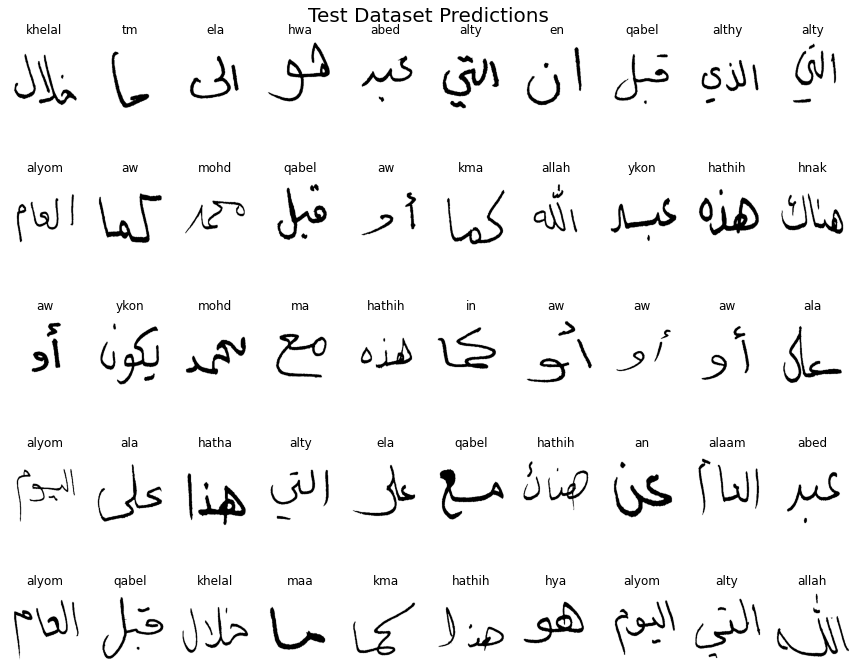

In [150]:
fig, ax = plt.subplots(nrows=5, ncols=10, figsize=(12, 10))
idx =  random.randrange(0,360)

for i in range(5):
    for j in range(10):
        predicted_label = dict_lab[np.argmax(y_pred_gen[idx])]
      
        ax[i, j].set_title(f"{predicted_label}")
        im = cv2.resize(X_test[idx], (200, 200))
        ax[i, j].imshow(im, cmap='Greys_r')
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Test Dataset Predictions", fontsize=20)
plt.show()

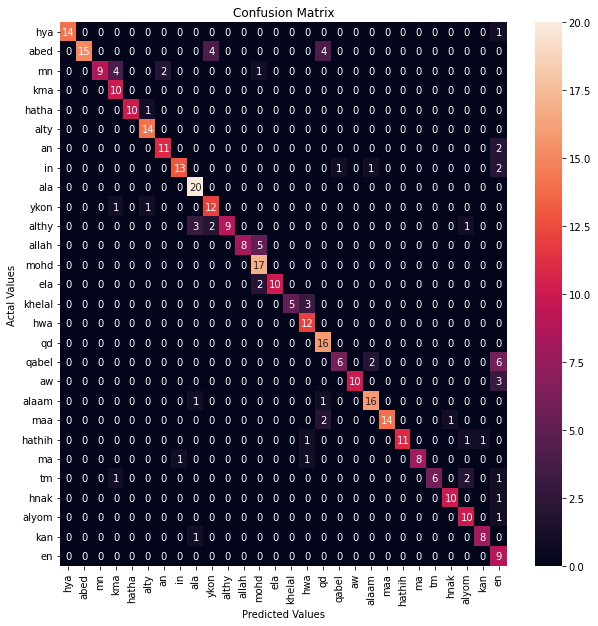

In [151]:
y_predm=np.argmax(y_pred_gen, axis=1)
y_testm=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_testm, y_predm)
cm
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.

cm_df = pd.DataFrame(cm,
                     index = unique_labels, 
                     columns = unique_labels)

plt.figure(figsize=(10,10))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()


In [152]:
#good score is >8 
cks = cohen_kappa_score(y_testm, y_predm)

In [153]:
ll = log_loss(y_test, y_pred_gen)

In [154]:
# Generate class membership probabilities
#good roc auc >8
ras = roc_auc_score(y_test, y_pred_gen, average="weighted", multi_class="ovr")

In [155]:
table = [[ll, cks, ras]]
pd.DataFrame(table, columns = ["log loss", "cohen kappa score", "roc auc score"])

,log loss,cohen kappa score,roc auc score
0,0.667959,0.812377,0.994011


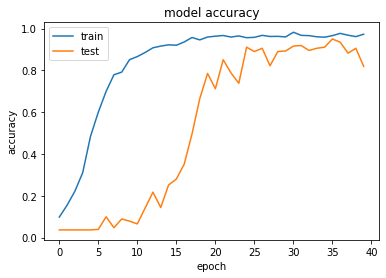

In [156]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


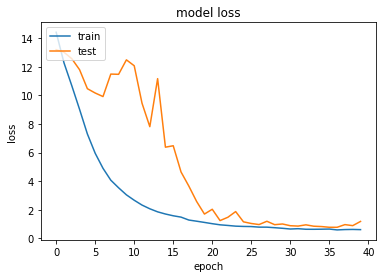

In [157]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [158]:
model.save('./models/alex_model_augdata.h5') 

In [159]:
!mv /content/models/alex_model_augdata.h5 /content/drive/MyDrive/OCR-DATASET-PROF

# Model 2 with data gen

In [12]:
model_da2 = Sequential()

model_da2.add(Conv2D(filters= 32, kernel_size = (3,3), input_shape=(200,200,1), strides=(4,4), activation="tanh"))
model_da2.add(BatchNormalization())
model_da2.add(MaxPool2D(pool_size=(3,3), strides=(2,2)))
model_da2.add(Conv2D(filters=95, kernel_size=(5,5), strides=(1,1), activation='tanh', padding="same",kernel_regularizer =tf.keras.regularizers.l2( l=0.01))) 
model_da2.add(BatchNormalization())
model_da2.add(MaxPool2D(pool_size=(3,3), strides=(2,2)))
model_da2.add(Conv2D(filters=95, kernel_size=(3,3), strides=(1,1), activation='tanh', padding="same",kernel_regularizer =tf.keras.regularizers.l2( l=0.01))) 
model_da2.add(BatchNormalization())
model_da2.add(MaxPool2D(pool_size=(3,3), strides=(2,2)))

model_da2.add(Flatten())
model_da2.add(Dense(4096, activation='tanh'))
model_da2.add(Dropout(0.5))
model_da2.add(Dense(512, activation='tanh',kernel_regularizer =tf.keras.regularizers.l2( l=0.01)))
model_da2.add(Dropout(0.5))
model_da2.add(Dense(28, activation='softmax'))
model_da2.compile(optimizer=tf.keras.optimizers.Nadam(epsilon=0.001),
              loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
history = model_da2.fit(train_generator,
                    steps_per_epoch=len(X_train) // batch_size,
                    epochs=40,
                    validation_data=(validation_generator))

Epoch 1/40
31/31 [==============================] - 19s 565ms/step - loss: 14.2554 - accuracy: 0.0494 - val_loss: 12.4186 - val_accuracy: 0.0445
Epoch 2/40
31/31 [==============================] - 18s 568ms/step - loss: 11.3800 - accuracy: 0.0839 - val_loss: 10.3367 - val_accuracy: 0.0890
Epoch 3/40
31/31 [==============================] - 17s 559ms/step - loss: 9.0489 - accuracy: 0.1644 - val_loss: 8.6240 - val_accuracy: 0.1152
Epoch 4/40
31/31 [==============================] - 17s 559ms/step - loss: 7.2403 - accuracy: 0.2963 - val_loss: 7.6886 - val_accuracy: 0.1126
Epoch 5/40
31/31 [==============================] - 20s 644ms/step - loss: 5.6917 - accuracy: 0.4824 - val_loss: 5.7568 - val_accuracy: 0.3770
Epoch 6/40
31/31 [==============================] - 17s 559ms/step - loss: 4.6010 - accuracy: 0.6407 - val_loss: 5.0355 - val_accuracy: 0.4686
Epoch 7/40
31/31 [==============================] - 18s 563ms/step - loss: 3.8123 - accuracy: 0.7341 - val_loss: 4.9001 - val_accuracy: 0.

In [18]:
redim_test = []
for x in X_test:
  redim_test.append( x/ 255)

redim_test = np.array(redim_test)

In [19]:
y_pred_gen = model_da2.predict(redim_test)

12/12 [==============================] - 1s 81ms/step


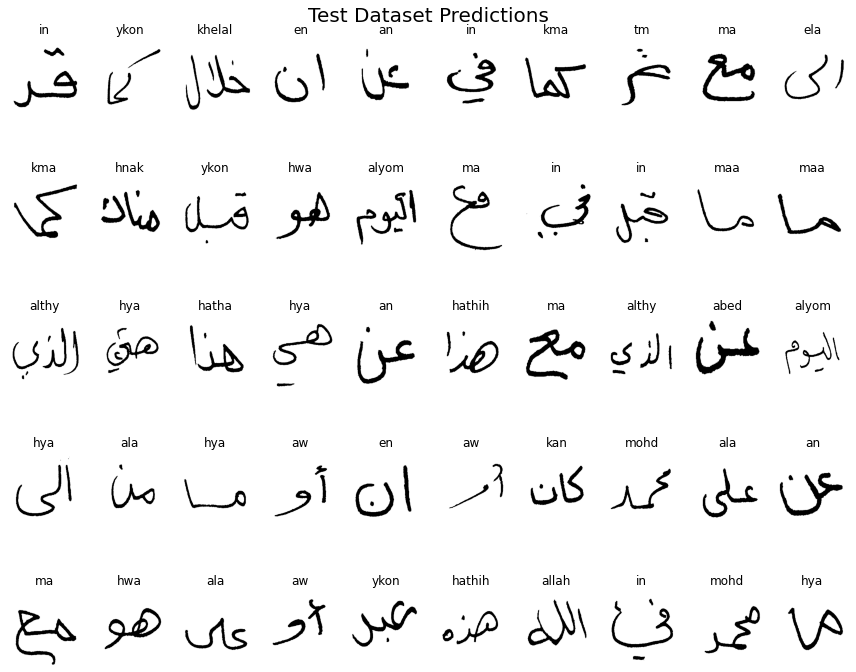

In [20]:
fig, ax = plt.subplots(nrows=5, ncols=10, figsize=(12, 10))
idx =  random.randrange(0,360)

for i in range(5):
    for j in range(10):
        predicted_label = dict_lab[np.argmax(y_pred_gen[idx])]
      
        ax[i, j].set_title(f"{predicted_label}")
        im = cv2.resize(X_test[idx], (200, 200))
        ax[i, j].imshow(im, cmap='Greys_r')
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Test Dataset Predictions", fontsize=20)
plt.show()

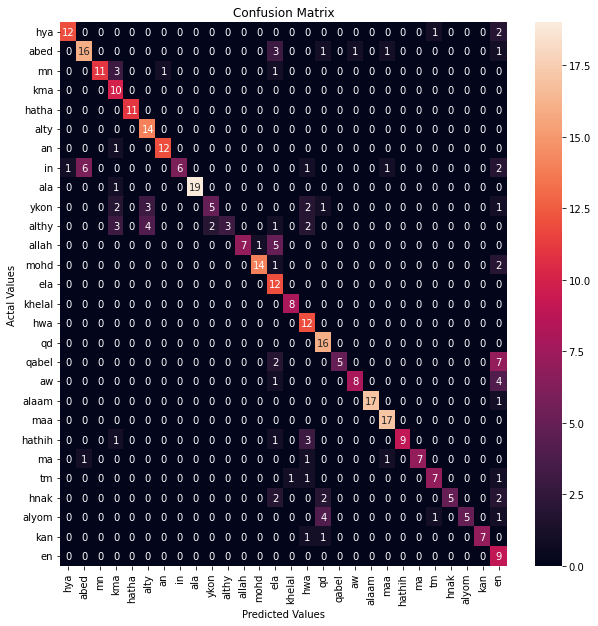

In [21]:
y_predm=np.argmax(y_pred_gen, axis=1)
y_testm=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_testm, y_predm)
cm
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.

cm_df = pd.DataFrame(cm,
                     index = unique_labels, 
                     columns = unique_labels)

plt.figure(figsize=(10,10))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()


In [22]:
#good score is >8 
cks = cohen_kappa_score(y_testm, y_predm)

In [23]:
ll = log_loss(y_test, y_pred_gen)

In [24]:
# Generate class membership probabilities
#good roc auc >8
ras = roc_auc_score(y_test, y_pred_gen, average="weighted", multi_class="ovr")

In [25]:
table = [[ll, cks, ras]]
pd.DataFrame(table, columns = ["log loss", "cohen kappa score", "roc auc score"])

,log loss,cohen kappa score,roc auc score
0,1.110434,0.733692,0.992376


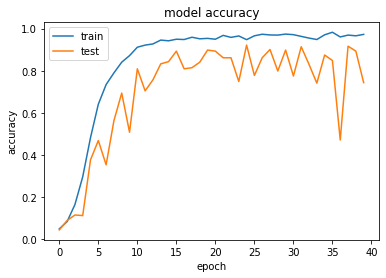

In [26]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


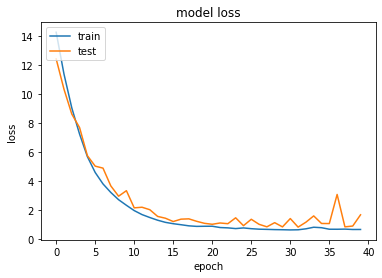

In [27]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [29]:
model_da2.save('./models/alex2_model_augdata.h5') 

In [30]:
!mv /content/models/alex2_model_augdata.h5 /content/drive/MyDrive/OCR-DATASET-PROF